# TP1: Composição Chroma Key

In [1]:
%reset

import matplotlib.pyplot as plt
import skimage.exposure  as skie
import numpy             as np
import seaborn           as sns
import skimage           as sk
import skimage.io        as io
import skimage.color     as color

from skimage.transform import rescale, rotate
from skimage           import img_as_float, filters, exposure
from skimage.draw      import set_color
from skimage.util      import crop
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Função que mostra uma imagem:

In [2]:
def show(img):
    fig, ax = plt.subplots(1, 1)
    ax.imshow(img)
    ax.set_axis_off()
    plt.show()

Histograma do H em hsv:

In [3]:
def hist_h(img,intensidade,x1,x2):
    plt.hist(img[:,:,0].flatten(),256)
    plt.xlim((x1,x2))
    plt.ylim((0,intensidade))
    plt.show()

Imagem de fundo:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


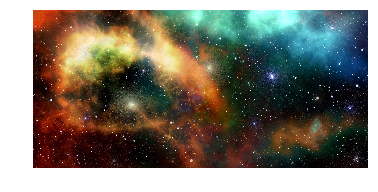

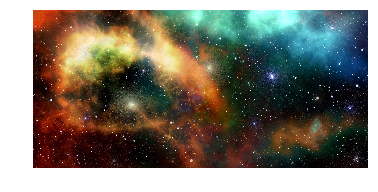

In [4]:
background = rescale(io.imread('universe-2742113_1920.jpg'),1)  
#background = crop(background,((0,0),(0,500),(0,0)))
show(background)
out = background.copy()
show(out)

### Método para o Chroma Key

O método para retirada do Chroma Key e inserção será apresentado para a imagem do gato1 e em seguida aplicado para as outras imagens.

A imagem será ampliada com a função rescale e cortada com a função crop para que o gato esteja "apoiado" na parte inferior do background:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


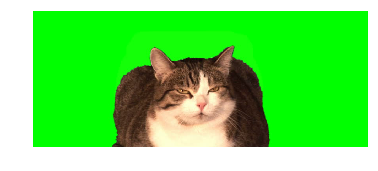

In [6]:
n=1.5
gato = rescale(io.imread('cat.jpg'),n)
gato = crop(gato,((0,200),(0,0),(0,0)))
show(gato)

Transformamos a imagem em hsv e aplicamos a função que dá o histograma de H nesse espaço de cor:

Histograma de cor


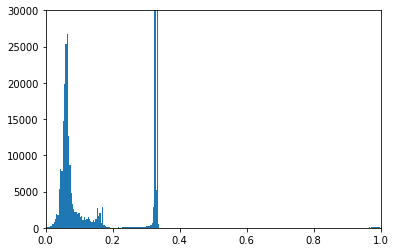

In [7]:
gatohsv = color.rgb2hsv(gato)
print('Histograma de cor')
hist_h(gatohsv,30000,0,1)

Zoom no pico de intensidade maior para identificar o intervalo com o verde de fundo:

Zoom na cor de fundo


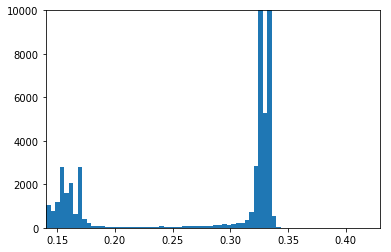

In [8]:
print('Zoom na cor de fundo')
hist_h(gatohsv,10000,0.14,0.43)


Função que define uma máscara True e False com H no intervalo hmaior>h>hmenor para uma imagem em hsv (com True no intervalo do H do verde de fundo):

In [9]:
def mascara(hsv,hmaior,hmenor):
    h, s, v = np.rollaxis(hsv, axis=-1)
    return (hmaior>h) & (h>hmenor)


A partir do histograma podemos identificar o verde do fundo como H entre 0.28 e 0.37 e aplicar a função definida:

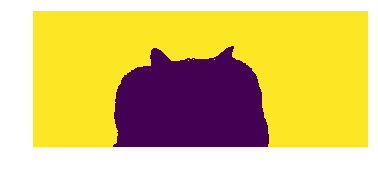

In [10]:
maskgato = mascara(gatohsv,0.35,0.20)
show(maskgato)

A função sobrepor criará um vetor com a informação da imagem sem o fundo verde e o substituirá no background na posição indicada usando como parâmetros de entrada a imagem do chromakey, a máscara do fundo verde, o background, e as posições x0 e y0:

In [11]:
def sobrepor(background,img,mask1,x0 = 0,y0 = 0):
    mask_background = np.ones((background.shape[0],background.shape[1]), dtype=bool) #cria uma matriz bool = True do tamanho do background
    mask_background[y0:(mask1.shape[0]+y0),x0:(mask1.shape[1]+x0)] = mask1           #substitui os valores da matriz anterior pelos da máscara desejada a partir de (x0,y0)
    for i in range(3):
        img_aux = np.ma.array(img[:,:,i],mask=mask1)                                 #cria uma imagem com a máscara em rgb
        np.place(background[:,:,i],~mask_background,img_aux.compressed())            #a função compressed em uma imagem com máscara vai retornar um vetor somente com os valores onde a máscara é False
    return background                                                                #np.place irá substituir os valores do background em rgb somente onde os valores da máscara do background é True (para isso precisamos inverter a matriz da máscara de background)

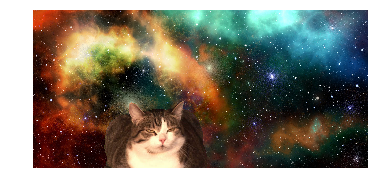

In [12]:
sobrepor(out,gato,maskgato,x0 = 100,y0 = 384)
show(out)

#### Segundo gato:

Para adicionar o segundo gato usaremos o mesmo método anteriormente e ainda a função gamma de ajuste de exposição para escurecer a imagem:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


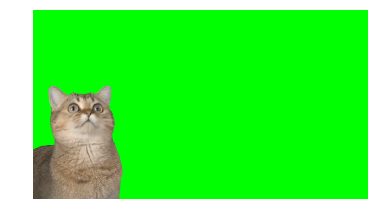

In [13]:
gato2 = rescale(io.imread('cat4.jpg'),n)   
show(gato2)

##### A função gamma:
O ajuste de gamma é uma correção não linear dada pela função:

$V_{out} = A V_{in}^{\gamma}$

Usaremos $A=1$ e para valores $\gamma<1$ é chamada compressão gamma e para $\gamma>1$ expansão gamma. A função gamma será usada para ajustar brilho e contraste nas imagens:

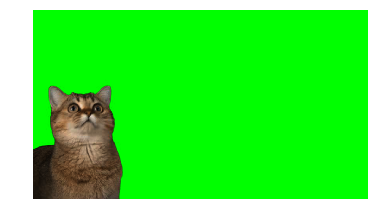

In [14]:
gato2esc = exposure.adjust_gamma(gato2, 2)
show(gato2esc)

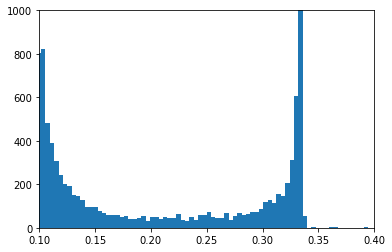

In [15]:
gato2hsv = color.rgb2hsv(gato2esc)
hist_h(gato2hsv,1000,0.1,0.4)

Identificamos o intervalo do verde de fundo dessa imagem como 0.35>h>0.25 e a imagem foi sobreposta como anteriormente:

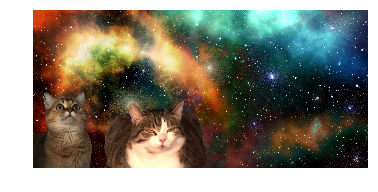

In [16]:
maskgato2 = mascara(gato2hsv,0.35,0.25)
sobrepor(out,gato2esc,maskgato2,x0 = 0,y0=183)
show(out)

#### Keyboard cat

Rescala e ajuste de contraste pela correção gamma:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


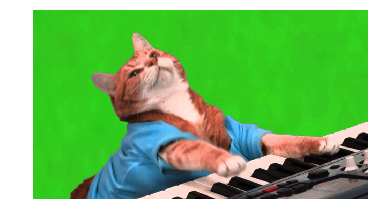

In [17]:
gato3 = rescale(io.imread('cat6.jpg'),0.5)   
gato3esc = exposure.adjust_gamma(gato3, 1.3)

show(gato3esc)

Zoom na cor de fundo


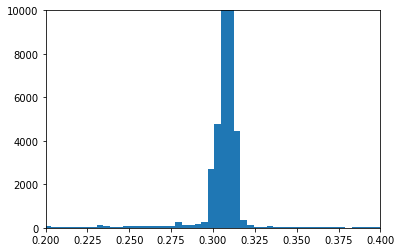

In [18]:
gato3hsv = color.rgb2hsv(gato3)
print('Zoom na cor de fundo')
hist_h(gato3hsv,10000,0.2,0.4)

Posicionando no canto inferior direito e aplicando a máscara:

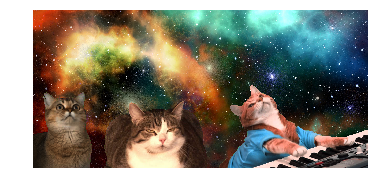

In [19]:
x0 = out.shape[1]-gato3.shape[1]
y0 = out.shape[0]-gato3.shape[0]

maskgato3 = mascara(gato3hsv,0.4,0.2)

sobrepor(out,gato3esc,maskgato3,x0,y0)
show(out)

## Adicionando outras imagens

#### Bananas:

A imagem banana será adicionada muitas vezes no fundo, para isso identificaremos os intervalo de cor do verde do fundo da mesma forma como antes:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


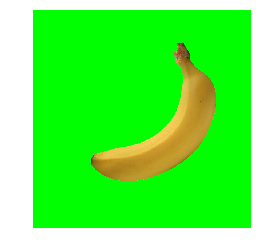

In [20]:
banana = rescale(io.imread('banana.jpg'),n*0.4)   
show(banana)

Histograma de cor


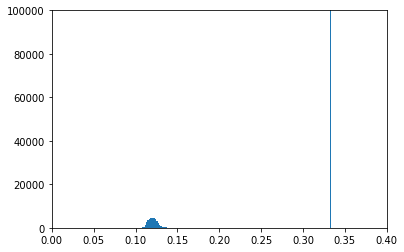

In [21]:
bananahsv = color.rgb2hsv(banana)
print('Histograma de cor')
hist_h(bananahsv,100000,0,0.4)

Zoom no H do fundo


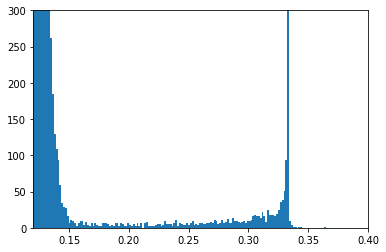

In [22]:
print('Zoom no H do fundo')
hist_h(bananahsv,300,0.12,0.4)

É possível identificar os limites para a máscara com H entre 0.2 e 0.35.

Como o objetivo era adicionar várias bananas com os mesmos limites de H, foi criada a função bananas com parâmetros de entrada (x0,y0, background, banana, crop_x1, crop_x2, crop_y1, crop_y2, gamma para correção, tam de rescale):

In [23]:
def bananas(x0=0,y0=0,background = out, img = banana,angulo = 0,crop_x1=0,crop_x2=0,crop_y1=0,crop_y2=0,gamma=1.,tam = 1.):
    bananarot = rotate(banana,angulo,resize=False,mode='edge')
    bananacrop = rescale(crop(bananarot,((crop_y1,crop_y2),(crop_x1,crop_x2),(0,0))),tam)
    bananahsv = color.rgb2hsv(bananacrop)
    maskbanana = mascara(bananahsv,0.35,0.2)
    bananafinal = exposure.adjust_gamma(bananacrop, gamma)
    return sobrepor(background,bananafinal,maskbanana,x0,y0)


Assim, é possível adicionar bananas em sequência com correções gama maiores e escalas menores para obter um efeito de profundidade:

/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]
/home/janarf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


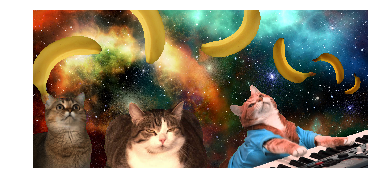

In [24]:
bananas(0,0,angulo = 170,crop_x1 = 100,tam=1.1)
bananas(200,0,angulo = 80,crop_y1 = 200,gamma = 0.9,tam = 1.2)
bananas(1550,200,angulo = 85,gamma = 2,tam = 0.5)
bananas(1280,59,angulo = 260,gamma = 1.5,tam = 0.7)
bananas(800,0,crop_y1 = 200)
bananas(1730,340,angulo = 10,gamma = 2.2, tam = 0.3)
show(out)

Ao final foi adicionado um filtro gaussiano em toda a imagem para tornar as bordas mais suaves:

In [25]:
final = filters.gaussian(out,multichannel = True)

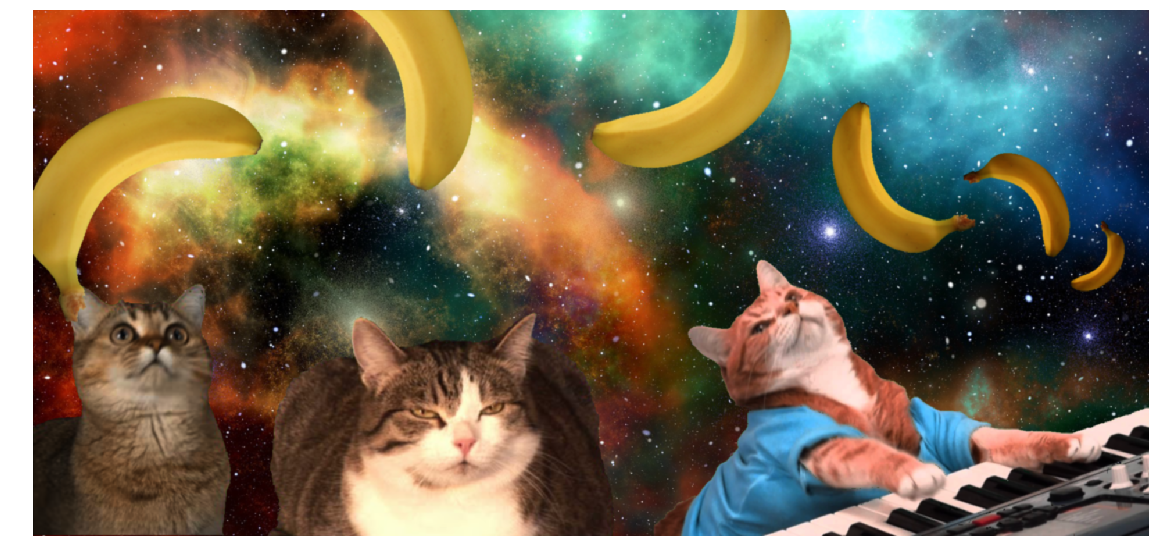

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
ax.imshow(final)
ax.set_axis_off()
plt.savefig('final.png', transparent = True, bbox_inches='tight', pad_inches = 0)

## Conclusão

Aprendemos a manipular imagens, plotar histogramas de cor utilizando o espaço hsv, selecionar cores e obter máscaras para imagens, rotacionar, cortar e mudar o contraste de imagens usando funções do pacote skimage.